In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten,Input
from keras.utils import to_categorical,plot_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
# 打印数据集的形状
print('训练集图像形状：', x_train.shape)
print('训练集标签形状：', y_train.shape)
print('测试集图像形状：', x_test.shape)
print('测试集标签形状：', y_test.shape)

训练集图像形状： (60000, 28, 28)
训练集标签形状： (60000, 10)
测试集图像形状： (10000, 28, 28)
测试集标签形状： (10000, 10)


In [6]:
model = Sequential()
input_layer=Input(shape=(28,28))
model.add(input_layer)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7467 - loss: 0.7448 - val_accuracy: 0.8424 - val_loss: 0.4512
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8529 - loss: 0.4160 - val_accuracy: 0.8569 - val_loss: 0.4012
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8683 - loss: 0.3703 - val_accuracy: 0.8602 - val_loss: 0.3980
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8757 - loss: 0.3435 - val_accuracy: 0.8682 - val_loss: 0.3750
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8837 - loss: 0.3218 - val_accuracy: 0.8683 - val_loss: 0.3616
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8884 - loss: 0.3099 - val_accuracy: 0.8726 - val_loss: 0.3513
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8926 - loss: 0.2942 - val_accuracy: 0.8744 - val_loss: 0.3531
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8957 - loss: 0.2848 - val_accuracy: 0.

In [8]:
# 评估模型
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3541906177997589
Test accuracy: 0.8790000081062317


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


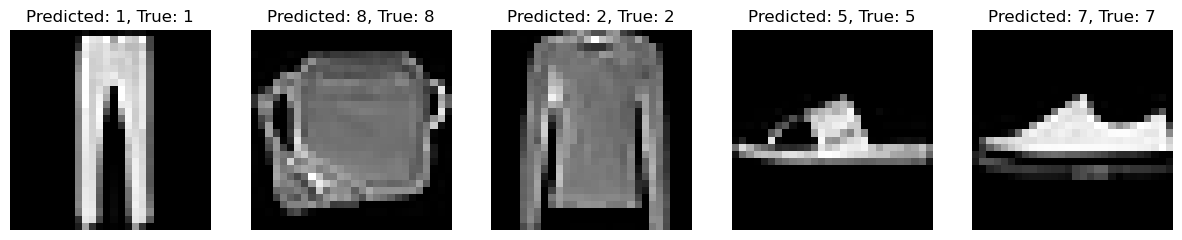

In [9]:
# 从测试集中随机抽取五张图片进行预测和可视化
random_indices = np.random.choice(len(x_test), size=5, replace=False)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, index in enumerate(random_indices):
    img = x_test[index]
    predicted_class = model.predict(np.expand_dims(img, axis=0)).argmax(axis=-1)[0]
    true_class = y_test[index].argmax(axis=-1)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Predicted: {predicted_class}, True: {true_class}')
    axes[i].axis('off')

plt.show()

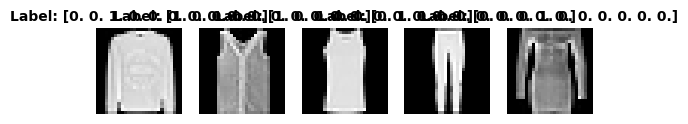

[[  0   0   0   0   0   0   0   0   0   0   0  18  33   0   0   0   4  64   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   2   0   0   0   0   2  79 169 208 206 253 249 255 235 227 232 132  21   0   0   1   1   0   0   0]
 [  0   0   0   1   0   0  81 174 206 223 227 214 215 174 108 198 219 215 217 224 212 177  48   0   0   0   0   0]
 [  0   0   0   0   0 127 234 229 218 215 216 220 220 227 231 228 217 220 223 221 220 228 236 105   0   0   0   0]
 [  0   0   0   0  20 203 207 215 212 219 217 218 217 219 219 216 218 218 220 223 219 217 223 194   0   0   0   0]
 [  0   0   0   0  66 214 211 211 214 215 217 216 217 217 216 216 219 219 220 220 219 221 215 218  39   0   0   0]
 [  0   0   0   0 103 215 220 201 217 215 215 217 219 217 216 218 216 217 216 216 218 220 210 228  95   0   0   0]
 [  0   0   0   0 157 203 223 203 212 215 214 217 225 226 228 228 210 214 214 212 220 216 215 227 134   0   0   0]
 [  0   0   0   0 202 195 219 210 204 212 227 227 219 215 221 219 218 220 217 21

In [10]:
# 随机选取五个索引
random_indices = np.random.choice(len(x_test), size=5, replace=False)

# 设置图像显示的标题样式
title_font = {'fontsize': 10, 'fontweight': 'bold'}

# 可视化五张图片及标签
for i, index in enumerate(random_indices):
    img = x_test[index]
    label = y_test[index]
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {label}', **title_font)
    plt.axis('off')

plt.show()
# 设置输出行宽度为无限
img=(x_test[random_indices[0]]*255).astype('uint8')
np.set_printoptions(linewidth=np.inf)

print(img)

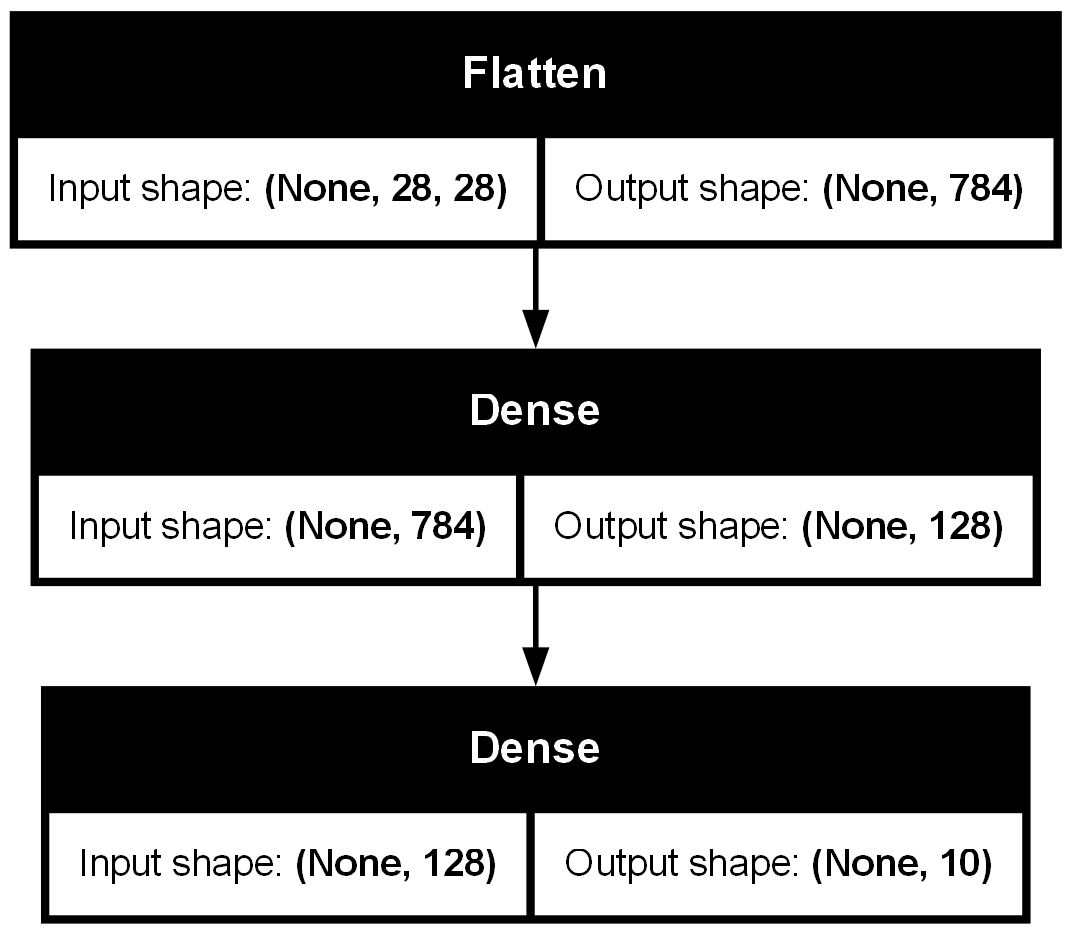

In [11]:
plot_model(model, to_file='model.png', show_shapes=True)